Members: Yichen Lin, Jiamu Chen, Arion Eidos (Yuqi Zhang)
Source: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [1]:
import numpy as np
import pandas as pd
from fractions import Fraction
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/Users/wood.chen/Desktop/JHU-24fall/Bayesian/Final Project/Sleep_health_and_lifestyle_dataset.csv')
datanew=data.drop(columns=['Occupation'])
datanew=datanew.set_index('Person ID')
bmi_mapping = {
    'Normal Weight': 0,
    'Normal': 1,
    'Overweight': 2,
    'Obese': 3
}

# process columns
datanew['BMI Category'] = datanew['BMI Category'].map(bmi_mapping)
datanew[['HBP', 'DBP']] = datanew['Blood Pressure'].str.split('/', expand=True)
datanew=datanew.drop(columns=['Blood Pressure'])
#tag mapping
sleep_disorder_mapping = {
    'Sleep Apnea': 1,
    'Insomnia': 2
}
datanew['Sleep Disorder'] = datanew['Sleep Disorder'].map(sleep_disorder_mapping).fillna(0).astype(int)


In [3]:
datanew

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,HBP,DBP
Person ID,,,,,,,,,,,,
1,Male,27,6.1,6,42,6,2,77,4200,0,126,83
2,Male,28,6.2,6,60,8,1,75,10000,0,125,80
3,Male,28,6.2,6,60,8,1,75,10000,0,125,80
4,Male,28,5.9,4,30,8,3,85,3000,1,140,90
5,Male,28,5.9,4,30,8,3,85,3000,1,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,8.1,9,75,3,2,68,7000,1,140,95
371,Female,59,8.0,9,75,3,2,68,7000,1,140,95
372,Female,59,8.1,9,75,3,2,68,7000,1,140,95


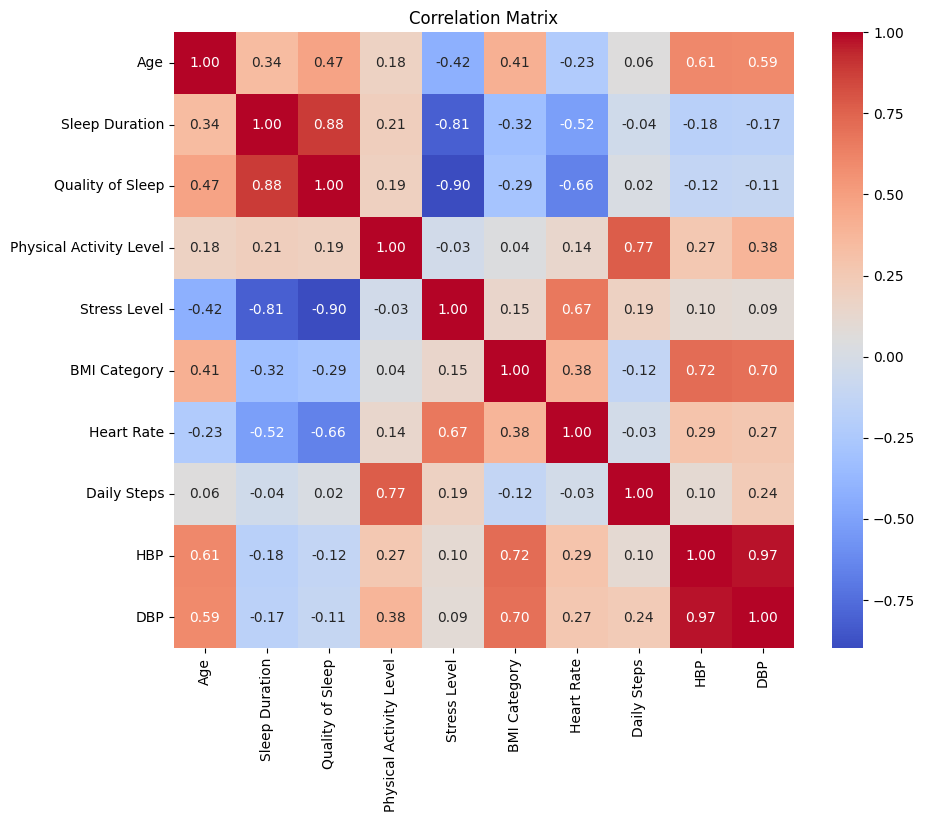

In [6]:
#sample data 
datas=datanew.drop(columns=['Gender','Sleep Disorder'])

#choose variable based on correlation
correlation_matrix = datas.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [7]:
data_use=datanew[['Age','Sleep Duration','BMI Category','Physical Activity Level','Stress Level','HBP','Sleep Disorder']]
data_use

,Age,Sleep Duration,BMI Category,Physical Activity Level,Stress Level,HBP,Sleep Disorder
Person ID,,,,,,,
1,27,6.1,2,42,6,126,0
2,28,6.2,1,60,8,125,0
3,28,6.2,1,60,8,125,0
4,28,5.9,3,30,8,140,1
5,28,5.9,3,30,8,140,1
...,...,...,...,...,...,...,...
370,59,8.1,2,75,3,140,1
371,59,8.0,2,75,3,140,1
372,59,8.1,2,75,3,140,1


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

#data set
X = data_use.drop(columns=['Sleep Disorder']) 
y = data_use['Sleep Disorder']  # target
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#result
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.92      0.75      0.83        16
           2       0.82      0.88      0.85        16

    accuracy                           0.91        75
   macro avg       0.89      0.87      0.88        75
weighted avg       0.91      0.91      0.90        75

Accuracy: 0.9066666666666666


/Users/wood.chen/miniconda3/envs/py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/wood.chen/miniconda3/envs/py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
